# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
city = cities[0]
city

"st. john's"

In [5]:
city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
response = requests.get(city_url)
city_weather=response.json()
city_weather

{'coord': {'lon': -52.7093, 'lat': 47.5649},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 42.66,
  'feels_like': 33.8,
  'temp_min': 40.78,
  'temp_max': 43.97,
  'pressure': 1037,
  'humidity': 75},
 'visibility': 10000,
 'wind': {'speed': 20.71, 'deg': 220, 'gust': 26.46},
 'clouds': {'all': 75},
 'dt': 1702920727,
 'sys': {'type': 1,
  'id': 998,
  'country': 'CA',
  'sunrise': 1702898051,
  'sunset': 1702928429},
 'timezone': -12600,
 'id': 6324733,
 'name': "St. John's",
 'cod': 200}

In [6]:
city_weather.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [7]:
city_weather["coord"]

{'lon': -52.7093, 'lat': 47.5649}

In [8]:
city_weather["main"]

{'temp': 42.66,
 'feels_like': 33.8,
 'temp_min': 40.78,
 'temp_max': 43.97,
 'pressure': 1037,
 'humidity': 75}

In [10]:
city_weather["sys"]

{'type': 1,
 'id': 998,
 'country': 'CA',
 'sunrise': 1702898051,
 'sunset': 1702928429}

In [13]:
city_lat = city_weather.get("coord", {}).get("lat", None)
city_lon = city_weather.get("coord", {}).get("lon", None)
city_max_temp = city_weather.get("main", {}).get("temp_max", None)
city_humidity = city_weather.get("main", {}).get("humidity", None)
city_clouds = city_weather.get("clouds", {}).get("all", None)
city_wind = city_weather.get("wind", {}).get("speed", None)
city_country = city_weather.get("sys", {}).get("country", None)
city_date = city_weather.get("dt", None)

In [14]:
{"City": city, 
 "Lat": city_lat, 
 "Lon": city_lon, 
 "Max Temp": city_max_temp, 
 "Humidity": city_humidity,
 "Cloudiness": city_clouds,
 "Wind Speed": city_wind,
 "Country": city_country,
 "Date": city_date}

{'City': "st. john's",
 'Lat': 47.5649,
 'Lon': -52.7093,
 'Max Temp': 43.97,
 'Humidity': 75,
 'Cloudiness': 75,
 'Wind Speed': 20.71,
 'Country': 'CA',
 'Date': 1702920727}

In [20]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    response = requests.get(city_url)
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat", None)
        city_lon = city_weather.get("coord", {}).get("lon", None)
        city_max_temp = city_weather.get("main", {}).get("temp_max", None)
        city_humidity = city_weather.get("main", {}).get("humidity", None)
        city_clouds = city_weather.get("clouds", {}).get("all", None)
        city_wind = city_weather.get("wind", {}).get("speed", None)
        city_country = city_weather.get("sys", {}).get("country", None)
        city_date = city_weather.get("dt", None)

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lon, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | st. john's
Processing Record 2 of Set 1 | badger
Processing Record 3 of Set 1 | ulsteinvik
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | altagracia de orituco
Processing Record 6 of Set 1 | lihue
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | sisimiut
Processing Record 10 of Set 1 | saldanha
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | taiohae
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | sur
Processing Record 17 of Set 1 | ust-nera
Processing Record 18 of Set 1 | tobelo
Processing Record 19 of Set 1 | xunchang
Processing Record 20 of Set 1 | pisco
Processing Record 21 of Set 1 | ust-tsilma
Processing Record 22 of Set 1 | sinabang
Processing Record 23 of

Processing Record 42 of Set 4 | 'ohonua
Processing Record 43 of Set 4 | loreto
Processing Record 44 of Set 4 | aguilar de campoo
Processing Record 45 of Set 4 | qaqortoq
Processing Record 46 of Set 4 | vorkuta
Processing Record 47 of Set 4 | shingu
Processing Record 48 of Set 4 | piton saint-leu
Processing Record 49 of Set 4 | xiulin
Processing Record 0 of Set 5 | wailua homesteads
Processing Record 1 of Set 5 | misratah
Processing Record 2 of Set 5 | catia la mar
Processing Record 3 of Set 5 | tot'ma
Processing Record 4 of Set 5 | uzhur
Processing Record 5 of Set 5 | bubaque
Processing Record 6 of Set 5 | tindouf
Processing Record 7 of Set 5 | takamaka
Processing Record 8 of Set 5 | maisi
Processing Record 9 of Set 5 | santa cruz
Processing Record 10 of Set 5 | muravlenko
Processing Record 11 of Set 5 | swift current
Processing Record 12 of Set 5 | ostrow mazowiecka
Processing Record 13 of Set 5 | djambala
Processing Record 14 of Set 5 | khovd
Processing Record 15 of Set 5 | fortuna
P

Processing Record 38 of Set 8 | al hasakah
Processing Record 39 of Set 8 | itoman
Processing Record 40 of Set 8 | palora
Processing Record 41 of Set 8 | lerma
Processing Record 42 of Set 8 | medvezh'yegorsk
Processing Record 43 of Set 8 | palanga
Processing Record 44 of Set 8 | saudarkrokur
Processing Record 45 of Set 8 | manicore
Processing Record 46 of Set 8 | grand falls-windsor
Processing Record 47 of Set 8 | cadale
Processing Record 48 of Set 8 | butembo
Processing Record 49 of Set 8 | adrar
Processing Record 0 of Set 9 | hakha
Processing Record 1 of Set 9 | severo-yeniseyskiy
Processing Record 2 of Set 9 | ixtapa
Processing Record 3 of Set 9 | ta`u
Processing Record 4 of Set 9 | dikhil
Processing Record 5 of Set 9 | emerald
Processing Record 6 of Set 9 | palikir - national government center
Processing Record 7 of Set 9 | abraham's bay
Processing Record 8 of Set 9 | kencong
Processing Record 9 of Set 9 | zhosaly
Processing Record 10 of Set 9 | manokwari
Processing Record 11 of Set

Processing Record 32 of Set 12 | bhan
Processing Record 33 of Set 12 | moshi
Processing Record 34 of Set 12 | vadso
Processing Record 35 of Set 12 | chui
Processing Record 36 of Set 12 | kalemie
Processing Record 37 of Set 12 | villamontes
Processing Record 38 of Set 12 | belyy yar
Processing Record 39 of Set 12 | singarayakonda
-----------------------------
Data Retrieval Complete      
-----------------------------


In [21]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [22]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,st. john's,47.5649,-52.7093,42.28,76.0,75.0,20.71,CA,1.702921e+09
1,badger,64.8000,-147.5333,10.36,88.0,100.0,0.00,US,1.702922e+09
2,ulsteinvik,62.3432,5.8487,46.53,87.0,100.0,21.00,NO,1.702922e+09
3,blackmans bay,-43.0167,147.3167,57.33,94.0,99.0,2.26,AU,1.702922e+09
4,altagracia de orituco,9.8601,-66.3814,92.16,40.0,24.0,4.38,VE,1.702922e+09


In [23]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [24]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,st. john's,47.5649,-52.7093,42.28,76.0,75.0,20.71,CA,1.702921e+09
1,badger,64.8000,-147.5333,10.36,88.0,100.0,0.00,US,1.702922e+09
2,ulsteinvik,62.3432,5.8487,46.53,87.0,100.0,21.00,NO,1.702922e+09
3,blackmans bay,-43.0167,147.3167,57.33,94.0,99.0,2.26,AU,1.702922e+09
4,altagracia de orituco,9.8601,-66.3814,92.16,40.0,24.0,4.38,VE,1.702922e+09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

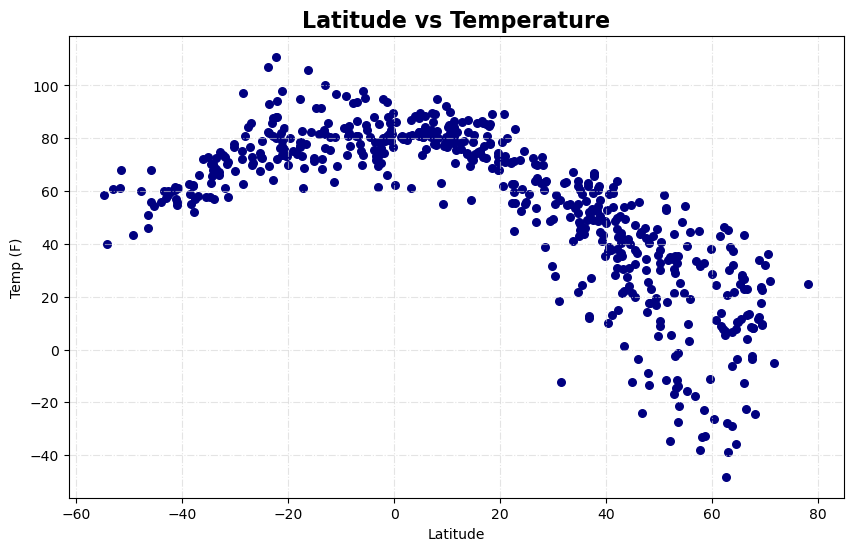

In [28]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color="navy", s=30)
plt.xlabel("Latitude")
plt.ylabel("Temp (F)")
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", alpha=0.6, linestyle="-.")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

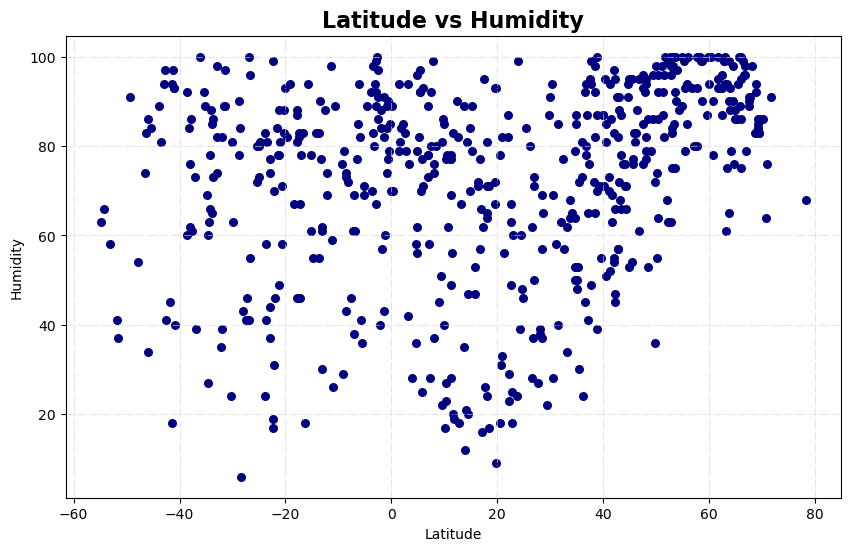

In [30]:
# Build scatter plot for latitude vs. humidity
# Incorporate the other graph properties
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color="navy", s=30)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", alpha=0.6, linestyle="-.")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

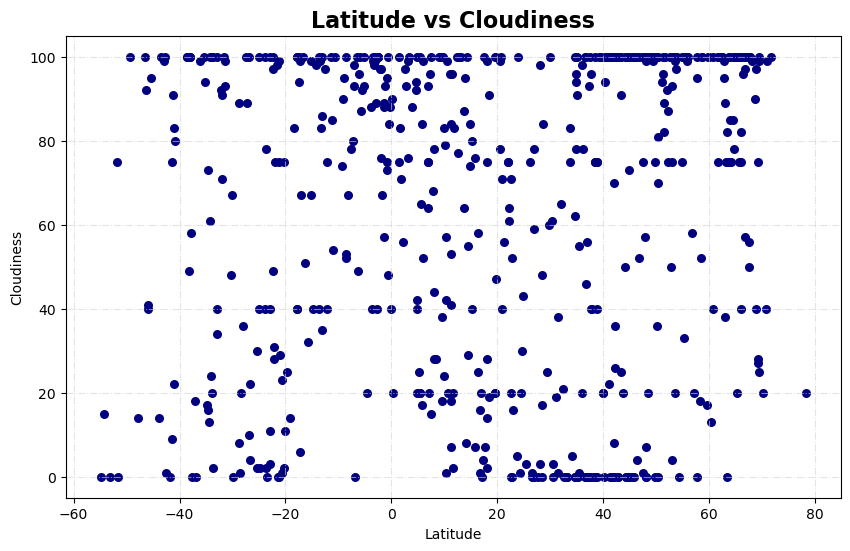

In [31]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color="navy", s=30)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", alpha=0.6, linestyle="-.")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

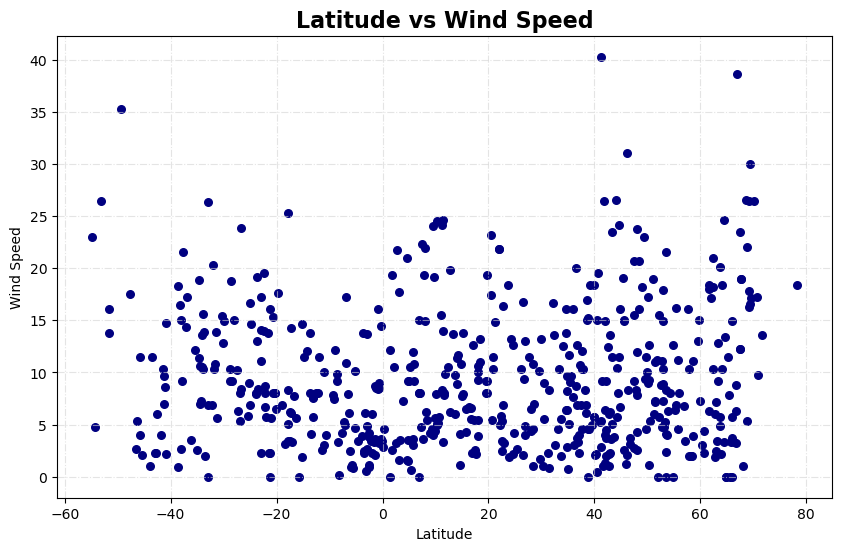

In [32]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
plt.figure(figsize=(10,6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color="navy", s=30)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", alpha=0.6, linestyle="-.")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [59]:
# Define a function to create Linear Regression plots
def makeLinearRegressionPlot(x_values, y_values, y_col, hemi, annot_loc):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # make plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,annot_loc,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f"{y_col}")
    plt.title(f"Latitude vs. {y_col} for the {hemi} Hemisphere")
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [50]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,st. john's,47.5649,-52.7093,42.28,76.0,75.0,20.71,CA,1.702921e+09
1,badger,64.8000,-147.5333,10.36,88.0,100.0,0.00,US,1.702922e+09
2,ulsteinvik,62.3432,5.8487,46.53,87.0,100.0,21.00,NO,1.702922e+09
4,altagracia de orituco,9.8601,-66.3814,92.16,40.0,24.0,4.38,VE,1.702922e+09
5,lihue,21.9789,-159.3672,71.19,82.0,75.0,21.85,US,1.702922e+09


In [51]:
northern_hemi_df.count(0)

City          381
Lat           381
Lng           381
Max Temp      381
Humidity      381
Cloudiness    381
Wind Speed    381
Country       381
Date          381
dtype: int64

In [52]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df.Lat <=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,blackmans bay,-43.0167,147.3167,57.33,94.0,99.0,2.26,AU,1.702922e+09
6,adamstown,-25.0660,-130.1015,72.91,80.0,100.0,16.71,PN,1.702922e+09
9,saldanha,-33.0117,17.9442,66.25,74.0,34.0,26.33,ZA,1.702922e+09
10,avarua,-21.2078,-159.7750,77.05,88.0,75.0,16.11,CK,1.702922e+09
11,port-aux-francais,-49.3500,70.2167,43.48,91.0,100.0,35.23,TF,1.702922e+09


In [53]:
southern_hemi_df.count()

City          185
Lat           185
Lng           185
Max Temp      185
Humidity      185
Cloudiness    185
Wind Speed    185
Country       181
Date          185
dtype: int64

###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6769473214261889


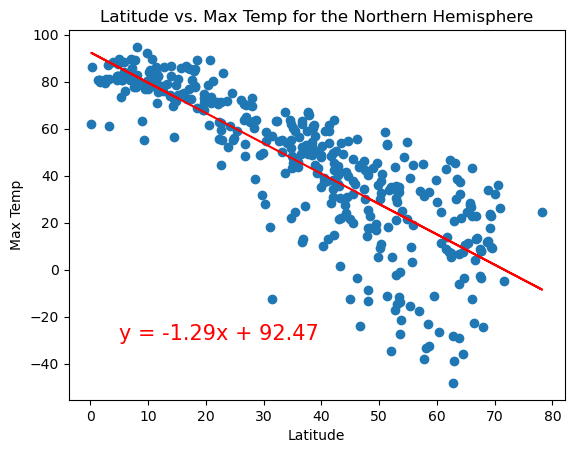

In [61]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

makeLinearRegressionPlot(x_values, y_values, "Max Temp", "Northern", (5, -30))

The r-squared is: 0.40056604519039674


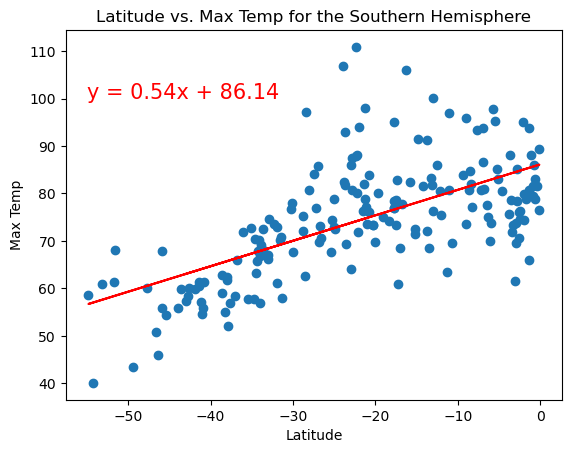

In [66]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

makeLinearRegressionPlot(x_values, y_values, "Max Temp", "Southern", (-55, 100))

**Discussion about the linear relationship:** With r-squared values above 0.1, there is evidence of correlation between latitude and temperature in both the northern and southern hemispheres.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.20406943573986


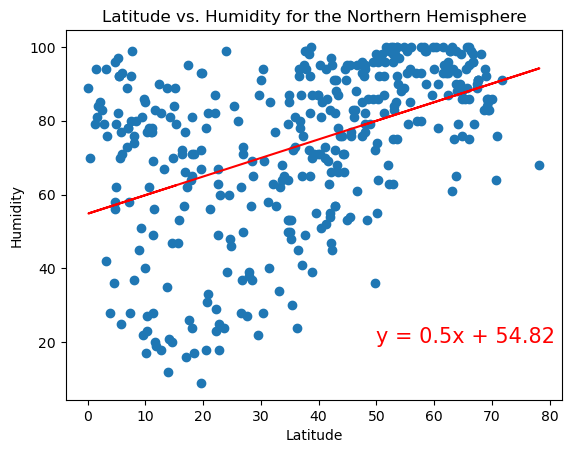

In [68]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

makeLinearRegressionPlot(x_values, y_values, "Humidity", "Northern", (50, 20))

The r-squared is: 0.0101542730575248


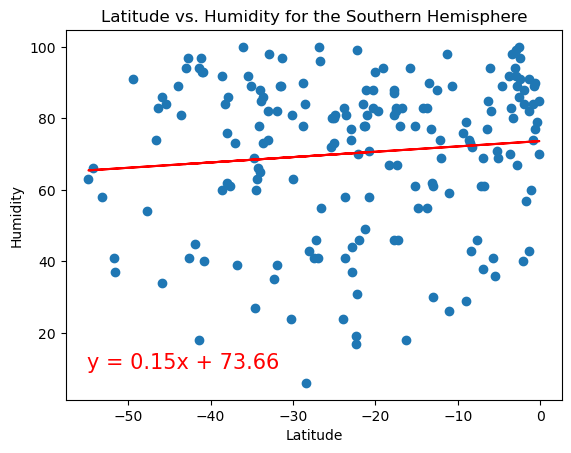

In [76]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

makeLinearRegressionPlot(x_values, y_values, "Humidity", "Southern", (-55, 10))

**Discussion about the linear relationship:** The southern hemisphere's r-squared value is below 0.5, so there is no correlation between latitude and humidity. The linear regression for the northern hemispheres shows a correlation as the r-squared value is above 0.1.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.03216589324173534


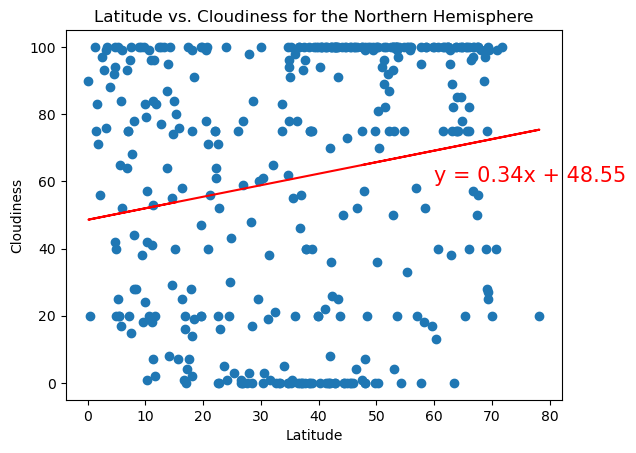

In [70]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

makeLinearRegressionPlot(x_values, y_values, "Cloudiness", "Northern", (60, 60))

The r-squared is: 0.08689759130684496


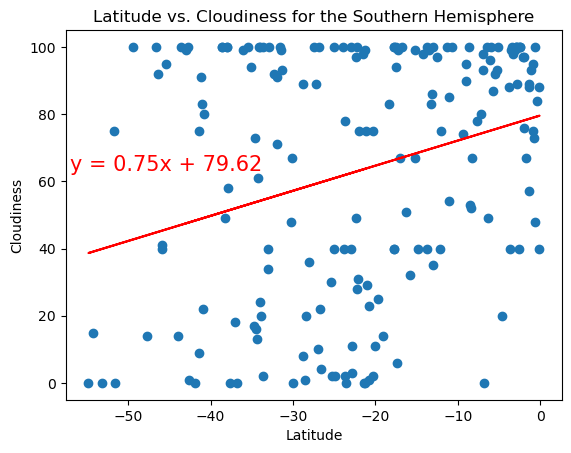

In [81]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

makeLinearRegressionPlot(x_values, y_values, "Cloudiness", "Southern", (-57, 63))

**Discussion about the linear relationship:** Both r-squared values for the northern and southern hemispheres show very little correlation as the values are below 0.1, with the correlation in the southern hemisphere being slightly stronger (above 0.5).

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.011714148207061232


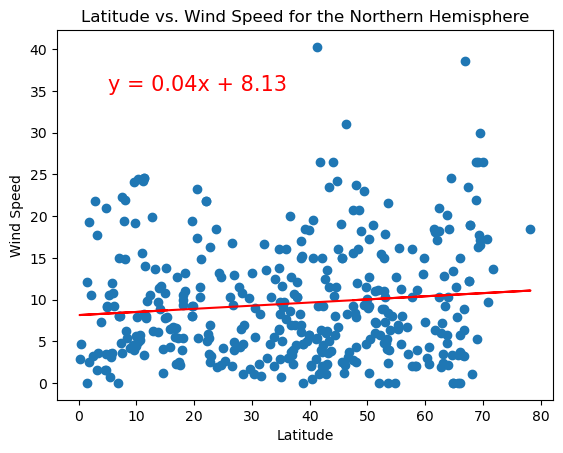

In [72]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

makeLinearRegressionPlot(x_values, y_values, "Wind Speed", "Northern", (5, 35))

The r-squared is: 0.11904349872322657


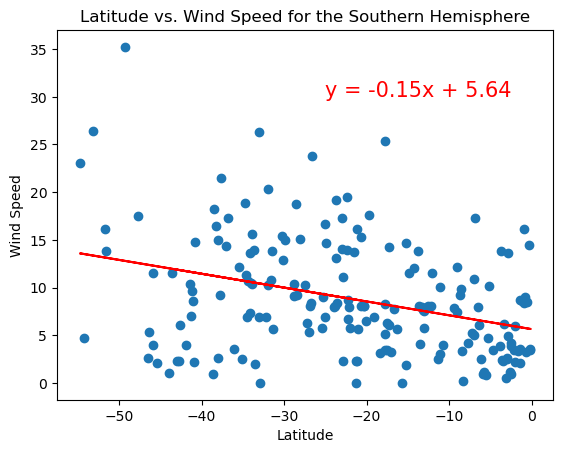

In [85]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

makeLinearRegressionPlot(x_values, y_values, "Wind Speed", "Southern", (-25, 30))

**Discussion about the linear relationship:** The linear regression shows correlation between the wind speed and latitude in the southern hemisphere (r-squared value above 0.1). It shows no correlation between wind speed and latitude in the northern hemisphere (r-squared value below 0.05).